In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [54]:
df.shape

(400, 9)

In [55]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
df.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [57]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [60]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [61]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [62]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()


,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


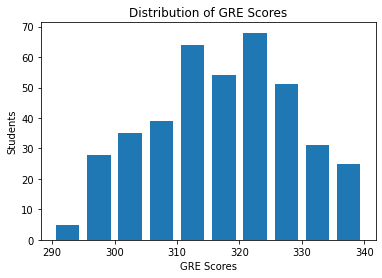

In [63]:
fig = plt.hist(df['GRE'], rwidth=0.75)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Students')
plt.show()

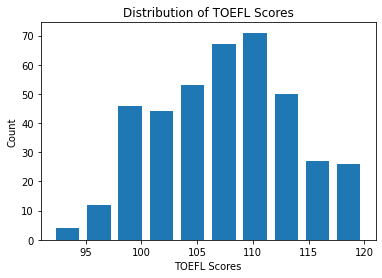

In [64]:
fig = plt.hist(df['TOEFL'], rwidth=0.75)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

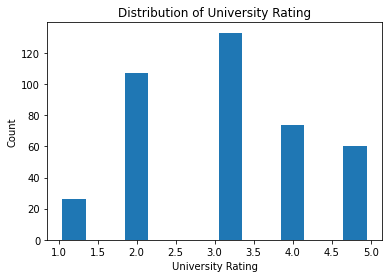

In [65]:
fig = plt.hist(df['University Rating'], rwidth=0.75)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

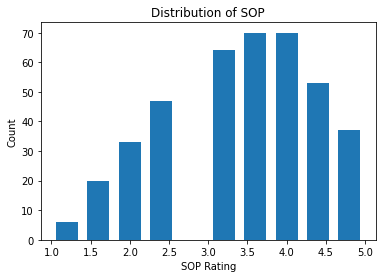

In [66]:
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

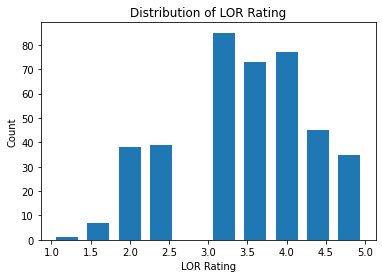

In [67]:
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

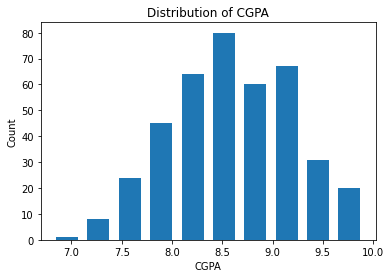

In [68]:
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

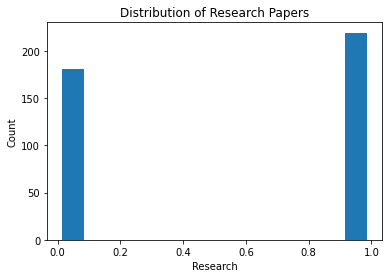

In [69]:
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

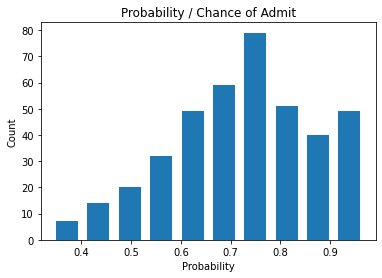

In [70]:
fig = plt.hist(df['Probability'], rwidth=0.7)
plt.title('Probability / Chance of Admit')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

In [71]:
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()


GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [73]:
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [74]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

In [88]:

# def find_best_model(X, y):
#     models = {
#         'linear_regression': {
#             'model': LinearRegression(),
#             'parameters': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'parameters': {
#                 'alpha': [0.1, 1, 10],
#                 'selection': ['cyclic', 'random']
#             }
#         },
#         'svr': {
#             'model': SVR(),
#             'parameters': {
#                 'C': [0.1, 1, 10],
#                 'gamma': [0.1, 1, 10],
#                 'kernel': ['linear', 'rbf', 'poly']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'parameters': {
#                 'criterion': ['mse', 'mae'],
#                 'splitter': ['best', 'random']
#             }
#         },
#         'random_forest': {
#             'model': RandomForestRegressor(),
#             'parameters': {
#                 'n_estimators': [10, 50, 100, 200],
#                 'max_depth': [None, 10, 20, 30],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4]
#             }
#         },
#         'knn': {
#             'model': KNeighborsRegressor(),
#             'parameters': {
#                 'n_neighbors': [2, 5, 10, 20],
#                 'weights': ['uniform', 'distance'],
#                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#             }
#         },
#         'gradient_boosting': {            
#             'model': GradientBoostingRegressor(),
#             'parameters': {
#                 'n_estimators': [50, 100, 200],
#                 'learning_rate': [0.01, 0.1, 1],
#                 'max_depth': [3, 5, 7],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'subsample': [0.5, 0.75, 1.0]
#             }
#         },
#         'xgboost': {
#             'model': XGBRegressor(),
#             'parameters': {
#                 'learning_rate': [0.01, 0.1, 1],
#                 'max_depth': [3, 5, 7],
#                 'n_estimators': [50, 100, 200],
#                 'subsample': [0.5, 0.75, 1.0],
#                 'reg_alpha': [0, 0.1, 0.5, 1],
#                 'reg_lambda': [0, 0.1, 0.5, 1]
#             }
#         }
#     }
    
#     scores = []
#     for model_name, model_params in models.items():
#         gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': model_name,
#             'best_parameters': gs.best_params_,
#             'score': gs.best_score_
#         })
    
#     return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])



In [87]:
# find_best_model(X, y)

In [77]:

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }

    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

In [78]:
find_best_model(X, y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},0.771179
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.212083
2,svr,{'gamma': 'scale'},0.608251
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.539512
4,random_forest,{'n_estimators': 20},0.750561
5,knn,{'n_neighbors': 20},0.679565


In [79]:
# # Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(normalize=True), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 77%


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

320 80


In [81]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.772829262603884

In [82]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into it is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))


Chance of getting into it is 93.297%


In [83]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into it is {}%'.format(round(model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))


Chance of getting into it is 73.795%
